# Module 4 Final Project - Neural Networks
## Masood Qaim
## Data Science - Oct Cohort Full Time
## Instructor: Rafael Carrasco

For this project, I will attempt to build a model that can accuracy classify images. Here are the steps:
    - load the dataset 
    - preprocess
    - build the model
    - train, test, and tune the model
    - explain the model

## Step 1: Load the dataset

In [1]:
#import libraries 
import pandas as pd #data stuff
import numpy as np #linear algebra
import matplotlib.pyplot as plt #preview image
import glob
%matplotlib inline
import os #iterate through directories 
import cv2 #image operation
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
#from keras.preprocessing.image import img_to_array

In [2]:
#loading the data set
datadir = r'C:\Users\Masood\Documents\FlatIron\module4\project\natural_images' #must put 'r' before string
categories = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


def create_training_data(datadir, categories):
    training_data = []
    for category in categories:
        path = os.path.join(datadir, category) #our path to the images
        class_label = categories.index(category) #lables our data; car, cat, dog,...
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #convert images to grayscale
            new_array = cv2.resize(img_array, (40, 40)) #resizing to 40x40 pixels so i can run/tune the model quickly 
            training_data.append([new_array, class_label])#this is where i made a mistake. i was passing img_array instead of new_array. that is why my img shape was not 128,128
    return training_data

training_data = create_training_data(datadir=datadir, categories=categories)

random.shuffle(training_data)

In [3]:
#confirm all images have been saved
print('The number of images in our dataset:', len(training_data))
print('The type of data is:', type(training_data))
print('How an image appears numerically:')
print(training_data[1])

#convert our dataset into an array
training_data_array = np.asarray(training_data)
print(type(training_data_array))

print('The shape of the data is:', training_data_array.shape, 'the first column is the data, second is the label')

The number of images in our dataset: 6899
The type of data is: <class 'list'>
How an image appears numerically:
[array([[128, 125, 120, ..., 126, 116, 103],
       [112,  72,  61, ..., 118, 117, 110],
       [132,  59,  69, ..., 133, 121, 105],
       ...,
       [152, 151, 146, ...,  52,  58,  58],
       [110, 104, 100, ..., 105,  98,  93],
       [ 77,  83,  87, ..., 106, 103, 105]], dtype=uint8), 0]
<class 'numpy.ndarray'>
The shape of the data is: (6899, 2) the first column is the data, second is the label


In [4]:
#seeing if lables are working
for lab_cat in training_data[:5]:
    print(lab_cat[1]) #index 0 is our data, index 1 is the label 

4
0
7
4
5


## Step 2: Preprocessing the data

Neural Networks will learn whatever data your run it though, so preprocessig is very important. If your data is not formatted or labeled correctly, it will learn incorrect features. The data should also be normalized so it does not crash the kernal.

Few notes about the shape:

    The input_shape of your first layer (in my case, the conv layer) has to be 3D:
        input_shape = (img_height, img_width, channel). channel meaning the depth, 3 for RBB, 1 for gray
        ex. input_shape = (128, 128, 1)
        
    X_train shape should match the following:
        (batch_size, img_height, img_width, channel)
        ex. (1000, 128, 128, 1)

In [5]:
X = [] # feature set
y = [] # lables

for features, label in training_data:
    X.append(features) #must be a numpy array
    y.append(label) #can be a list, but array is better
    
X = np.array(X)
X = X/255. #normalizing the data to read between 0-1

y = np.array(y)
mlb = LabelBinarizer() #a type of one hot encoding
y = mlb.fit_transform(y)

[[0.21568627 0.26666667 0.38039216 ... 0.3254902  0.34509804 0.34117647]
 [0.18823529 0.17647059 0.39215686 ... 0.41176471 0.40392157 0.29411765]
 [0.19215686 0.54509804 0.61176471 ... 0.38039216 0.38823529 0.30196078]
 ...
 [0.21568627 0.23137255 0.15294118 ... 0.58431373 0.48235294 0.50196078]
 [0.28235294 0.29803922 0.21960784 ... 0.55294118 0.54117647 0.49019608]
 [0.35294118 0.32156863 0.28235294 ... 0.54117647 0.44313725 0.44313725]]
The shape of the images is:  (40, 40)
[0 1 0 0 0 0 0 0]


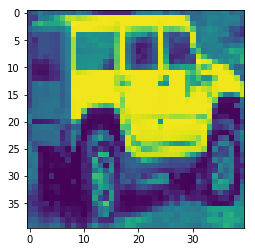

In [9]:
X = X.reshape((-1, 40, 40))

#confirm X is between 0-1, shape is 40,40, X[3] is motocycle, y[6] is [0 1 0 0 0 0 0 0]
test_i = 6
plt.imshow(X[test_i])
print(X[test_i])
print('The shape of the images is: ', X[test_i].shape)
print(y[test_i])

In [10]:
X = np.expand_dims(X, axis=4) #add an extra dimention so it can run through my model

C:\Users\Masood\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


In [11]:
#confirm correct shape before passing the data through the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)

(6209, 40, 40, 1)
(690, 40, 40, 1)


## Step 3: Building the Model

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [10]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = (40, 40, 1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 38, 38, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23104)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              23659520  
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0         
__________

## Step 4: Train, Test, and Tune the Model

## The is first attempt of the model

In [11]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=3,
          validation_split=0.3) #note, i removed X_train, y_train and just passe X, y because of validation split

Train on 4346 samples, validate on 1863 samples
Epoch 1/3
4346/4346 [==============================] - 115s 26ms/step - loss: 0.9879 - acc: 0.6636 - val_loss: 0.5065 - val_acc: 0.8298
Epoch 2/3
4346/4346 [==============================] - 111s 26ms/step - loss: 0.4481 - acc: 0.8373 - val_loss: 0.4857 - val_acc: 0.8148
Epoch 3/3
4346/4346 [==============================] - 110s 25ms/step - loss: 0.3344 - acc: 0.8774 - val_loss: 0.4214 - val_acc: 0.8363


- First attempt at my model yeiled a 86% accuracy and a loss of 0.37.
- The accuracy loss is 85% and validation loss is 0.41.
- you should expect your accuracy loss to be slightly lower and your validation loss to be slightly higher

## Fine Tuning my Model

- To improve my model, I will use TensorBoard to fine tune the paramaters
- Each model will have a unique name 

In [12]:
from keras.callbacks import TensorBoard
import time

To fine tune my model, I need to run multiple networks with different parameters. First I'll create the model conditions, then run the data.

In [13]:
#for each model, try a number from each side
dense_nums = [512, 1024, 2048]
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

#for i in list(dense_layers[1:]):
    #print(i)

#test the for loop to make sure the correct models run
for dense_num in dense_nums:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:
                NAME1 = '{}-conv-{}-nodes-{}-dense-{}'.format(conv_layer, layer_size, dense_layer, int(time.time()))
                print(NAME1)

1-conv-32-nodes-0-dense-1550001366
2-conv-32-nodes-0-dense-1550001366
3-conv-32-nodes-0-dense-1550001366
1-conv-64-nodes-0-dense-1550001366
2-conv-64-nodes-0-dense-1550001366
3-conv-64-nodes-0-dense-1550001366
1-conv-128-nodes-0-dense-1550001366
2-conv-128-nodes-0-dense-1550001366
3-conv-128-nodes-0-dense-1550001366
1-conv-32-nodes-1-dense-1550001366
2-conv-32-nodes-1-dense-1550001366
3-conv-32-nodes-1-dense-1550001366
1-conv-64-nodes-1-dense-1550001366
2-conv-64-nodes-1-dense-1550001366
3-conv-64-nodes-1-dense-1550001366
1-conv-128-nodes-1-dense-1550001366
2-conv-128-nodes-1-dense-1550001366
3-conv-128-nodes-1-dense-1550001366
1-conv-32-nodes-2-dense-1550001366
2-conv-32-nodes-2-dense-1550001366
3-conv-32-nodes-2-dense-1550001366
1-conv-64-nodes-2-dense-1550001366
2-conv-64-nodes-2-dense-1550001366
3-conv-64-nodes-2-dense-1550001366
1-conv-128-nodes-2-dense-1550001366
2-conv-128-nodes-2-dense-1550001366
3-conv-128-nodes-2-dense-1550001366
1-conv-32-nodes-0-dense-1550001366
2-conv-32-n

In [ ]:
# WARNING: THIS WILL TAKE OVER 5 HOURS TO RUN!!!!!!
#create a for loop for the conv, size of layer, and dense layer
for dense_num in dense_nums:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:
                NAME = '{}-conv-{}-nodes-{}-dense-{}'.format(conv_layer, layer_size, dense_layer, int(time.time()))
                tensorboard = TensorBoard(log_dir='log/{}'.format(NAME))
                model = Sequential()

                model.add(Conv2D(layer_size, (3,3), input_shape = (40, 40, 1)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size = (2,2)))

                for l in list(conv_layers):
                    model.add(Conv2D(layer_size, (3,3)))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size = (2,2)))

                model.add(Flatten())
                for l in list(dense_layers[1:]):
                    model.add(Dense(dense_num))
                    model.add(Activation('relu'))

                model.add(Dense(8))
                model.add(Activation('softmax'))

                model.compile(loss='categorical_crossentropy',
                             optimizer='adam',
                             metrics=['accuracy'])

                model.fit(X_train, y_train,
                          batch_size=32,
                          epochs=2,
                          validation_split=0.3,
                          callbacks=[tensorboard])

## Explain the Final Model

After crashing the kernal several times (need a new computer with more gpu, ram, and a better cpu), the best model is 2-conv-128-nodes-2-dense-1549925617 model. From tensorboard's graphs, this model had the lowest validation loss while maintaining a high accuracy.

In [51]:
#keras library import for Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

In [15]:
#serialize model to JSON
#the keras model which is trained is defined as 'model' in this example
model_json_1 = model.to_json()

with open("model_num.json", "w") as json_file:
    json_file.write(model_json_1)

#serialize weights to HDF5
model.save_weights("model_num.h5")

## Prediction Test

To test if my network model can actually predict images, I'll define a function to run against my model.

In [14]:
prediction = model.predict([X_test])

car


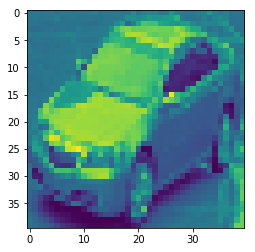

In [28]:
#0: airplane
#1: car
#2: cat
#3: dog
#4: flower
#5: fruit
#6: motorbike
#7: person

def print_prediction(predictions=prediction, j = None):
    if j is None:
        return "No image selected"
    classes = dict(zip(range(8), ["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]))
    classes

    img_lab = np.argmax(prediction[j])
    print(classes[img_lab])

    predic_img = X_test.squeeze()
    plt.imshow(predic_img[j]);
    return None

print_prediction(j=500)

car


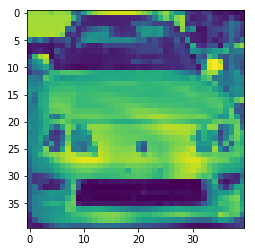

In [30]:
print_prediction(j = 600)

dog


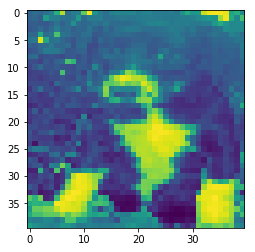

In [31]:
print_prediction(j=250)

Looks like my network model works.

In [12]:
!jupyter nbconvert --to markdown convolution_network.ipynb
!mv convolution_network.md README.md

[NbConvertApp] Converting notebook convolution_network.ipynb to markdown
[NbConvertApp] Support files will be in convolution_network_files\
[NbConvertApp] Making directory convolution_network_files
[NbConvertApp] Making directory convolution_network_files
[NbConvertApp] Making directory convolution_network_files
[NbConvertApp] Making directory convolution_network_files
[NbConvertApp] Writing 16718 bytes to convolution_network.md
